
# Styling

Panel-Objekte bauen auf [param](https://param.holoviz.org/) auf, wodurch für sie Parameter angegeben werden können, die  Benutzer flexibel bearbeiten können, um die angezeigte Ausgabe zu steuern. Zusätzlich zu den für jede Komponente und Komponentenklasse spezifischen Parametern definieren alle Komponenten einen gemeinsamen Satz von Parametern, um die Größe und den Stil des gerenderten View zu steuern.

In [1]:
import panel as pn


pn.extension()

## Styling-Komponenten 


### `css_classes`

Der`css_classes`-Parameter ermöglicht die Zuordnung einer Panel-Komponente zu einer oder mehreren CSS-Klassen. CSS-kann direkt im Notebook angegeben werden oder als Verweis auf eine externe CSS-Datei, indem sie mit `raw_css` oder `css_files` als Liste an die *Panel extension* übergeben werden. Außerhalb eines Notebooks, in einem externen Modul oder einer Bibliothek, können wir mit `pn.config.raw_css` und `pn.config.js_files` Konfigurationsparameter anhängen.

Um diese Verwendung zu demonstrieren, definieren wir eine CSS-Klasse mit dem Namen, `widget-box`:

In [2]:
css = """
.widget-box {
  background: #f0f0f0;
  border-radius: 5px;
  border: 1px black solid;
}
"""

pn.extension(raw_css=[css])

In [3]:
pn.Column(
    pn.widgets.FloatSlider(name="Quantity", margin=(20, 26, 6, 26)),
    pn.widgets.Select(
        name="Fruit",
        options=["Apple", "Pear", "Orange"],
        margin=(10, 26, 6, 26),
    ),
    pn.widgets.Button(name="Run", margin=(34, 26, 20, 26)),
    css_classes=["widget-box"],
)

Column(css_classes=['widget-box'])
    [0] FloatSlider(margin=(20, 26, 6, 26), name='Quantity')
    [1] Select(margin=(10, 26, 6, 26), name='Fruit', options=['Apple', 'Pear', ...], value='Apple')
    [2] Button(margin=(34, 26, 20, 26), name='Run')

### `background`

Wenn wir der Komponente einfach einen Hintergrund geben möchten, können wir einen als Hex-String definieren:

In [4]:
pn.Column(styles={"background": "#f0f0f0", "width": "100", "height": "100"})

Column(styles={'background': '#f0f0f0', ...})

### `style`

Bestimmte Komponenten, insbesondere markup-bezogene Panes, stellen einen `style`-Parameter zur Verfügung, mit dem CSS-Stile definiert werden können, die auf den HTML-Container des Fensterinhalts angewendet werden, z.B. das `Markdown`-Pane:

In [5]:
pn.pane.Markdown("### Cusy: DevOps", styles={"font-family": "sans-serif"})

Markdown(str, styles={'font-family': '...})

## Komponentengröße und Layout

Die Größe der Komponenten und ihr Abstand werden auch über eine Reihe von Parametern gesteuert, die von allen Komponenten gemeinsam verwendet werden.

### `margin`

Der `margin`-Parameter kann verwendet werden, um Platz rund um ein Element zu schaffen, das als Anzahl der Pixel in der Reihenfolge oben, rechts, unten und links definiert ist, z.B.:

In [6]:
pn.Row(
    pn.Column(
        pn.widgets.Button(name="Selector", margin=(20, 16, 20, 26)),
        styles={"background": "#f0f0f0"},
    ),
    pn.Column(
        pn.widgets.Button(name="Widget", margin=(20, 16, 20, 0)),
        styles={"background": "#f0f0f0"},
    ),
    pn.Column(
        pn.widgets.Button(name="Description", margin=(20, 26, 20, 0)),
        styles={"background": "#f0f0f0"},
    ),
)

Row
    [0] Column(styles={'background': '#f0f0f0'})
        [0] Button(margin=(20, 16, 20, 26), name='Selector')
    [1] Column(styles={'background': '#f0f0f0'})
        [0] Button(margin=(20, 16, 20, 0), name='Widget')
    [2] Column(styles={'background': '#f0f0f0'})
        [0] Button(margin=(20, 26, 20, 0), name='Description')

### Absolute Dimensionierung mit `width` und `height`

Standardmäßig verwenden alle Komponenten entweder die automatische oder die absolute Größenänderung. Bedienfelder nehmen im Allgemeinen so viel Platz ein wie die darin enthaltenen Komponenten, und text- oder bildbasierte Bedienfelder passen sich an die Größe ihres Inhalts an. Um eine feste Größe für eine Komponente festzulegen, ist es normalerweise ausreichend, eine Breite oder Höhe festzulegen. In bestimmten Fällen muss jedoch `sizing_mode='fixed'` explizit angegeben werden.

Row
    [0] Markdown(str, styles={'color': 'white', ...})
    [1] GIF(str, width=100)
    [2] FloatSlider(width=100)
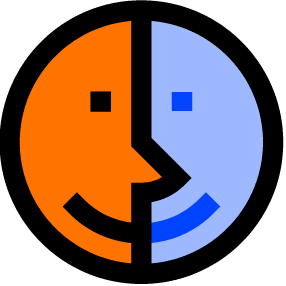

In [7]:
pn.Row(
    pn.pane.Markdown(
        "\>CUSY_",
        styles={
            "color": "white",
            "font-weight": "300",
            "background": "black",
            "width": "100px",
            "height": "100px",
            "padding": "10px",
        },
    ),
    pn.pane.GIF("../../ipywidgets/smiley.gif", width=100),
    pn.widgets.FloatSlider(width=100),
)

### `sizing_mode` 

`sizing_mode` kann die folgenden Werte annehmen:

* `fixed`: Die Komponente ist nicht responsiv. Die ursprüngliche Breite und Höhe wird unabhängig von nachfolgenden Ereignissen zur Größenänderung des Browserfensters beibehalten. Dies ist das Standardverhalten und verwendet einfach die angegebene Breite und Höhe.
* `stretch_width`: Die Komponente passt die Größe an, um sie auf die verfügbare Breite zu strecken, ohne jedoch das Seitenverhältnis beizubehalten. Die Höhe der Komponente hängt vom Typ der Komponente ab und kann fest oder an den Inhalt der Komponente gebunden sein.
* `stretch_height`: Die Größe der Komponente wird ansprechend angepasst, um sie auf die verfügbare Höhe zu erreichen, ohne jedoch das Seitenverhältnis beizubehalten. Die Breite der Komponente hängt vom Typ der Komponente ab und kann fest oder an den Inhalt der Komponente gebunden sein. 
* `stretch_both`: Die Komponente ist responsiv, unabhängig von Breite und Höhe, und belegt den gesamten verfügbaren horizontalen und vertikalen Raum, auch wenn sich dadurch das Seitenverhältnis der Komponente ändert.
* `scale_height`: Die Größe der Komponente wird ansprechend angepasst, um sie auf die verfügbare Höhe zu strecken, wobei das ursprüngliche oder bereitgestellte Seitenverhältnis beibehalten wird.
* `scale_width`: Die Größe der Komponente wird ansprechend angepasst, um sie auf die verfügbare Breite zu strecken, wobei das ursprüngliche oder bereitgestellte Seitenverhältnis beibehalten wird.
* `scale_both`: Die Größe der Komponente wird ansprechend auf die verfügbare Breite und Höhe angepasst, wobei das ursprüngliche oder bereitgestellte Seitenverhältnis beibehalten wird.

In [8]:
pn.pane.Str(styles={"background": "#f0f0f0", "height": "100", "sizing_mode": "stretch_width"})

Str(None, styles={'background': '#f0f0f0', ...})

In [9]:
pn.Column(
    pn.pane.Str(styles={"background": "#f0f0f0", "sizing_mode": "stretch_height"}), height=100
)

Column(height=100)
    [0] Str(None, styles={'background': '#f0f0f0', ...})

In [10]:
pn.Column(
    pn.pane.Str(styles={"background": "#f0f0f0", "sizing_mode": "stretch_both"}), height=100
)

Column(height=100)
    [0] Str(None, styles={'background': '#f0f0f0', ...})

Column(styles={'background': '#f0f0f0'})
    [0] GIF(str, sizing_mode='scale_both')
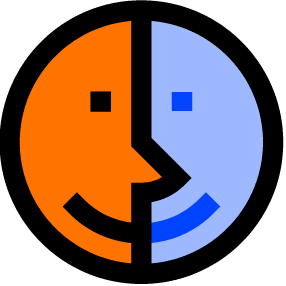

In [11]:
pn.Column(
    pn.pane.GIF("../../ipywidgets/smiley.gif", sizing_mode="scale_both"),
    styles={"background": "#f0f0f0"},
)

### `Spacer`

`Spacer` sind eine sehr vielseitige Komponente, mit der sich feste oder responsive Abstände zwischen Objekten problemlos herstellen lassen. Wie alle anderen Komponenten unterstützen `Spacer` sowohl den absoluten als auch den responsiven Modus:

In [12]:
pn.Row(
    1,
    pn.Spacer(width=200),
    2,
    pn.Spacer(width=100),
    3,
    pn.Spacer(width=50),
    4,
    pn.Spacer(width=25),
    5,
)

Row
    [0] Str(int)
    [1] Spacer(width=200)
    [2] Str(int)
    [3] Spacer(width=100)
    [4] Str(int)
    [5] Spacer(width=50)
    [6] Str(int)
    [7] Spacer(width=25)
    [8] Str(int)

`VSpacer` und `HSpacer` sorgen für einen ansprechenden vertikalen bzw. horizontalen Abstand. Mit diesen Komponenten können wir Objekte in einem Layout in gleichem Abstand platzieren und den leeren Bereich verkleinern, wenn die Größe des Browsers geändert wird:

In [13]:
pn.Row(
    "* Item 1\n* Item2",
    pn.layout.HSpacer(),
    "1. First\n2. Second",
    pn.layout.HSpacer(),
)

Row
    [0] Markdown(str)
    [1] HSpacer()
    [2] Markdown(str)
    [3] HSpacer()